# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [4]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
df.head(30)

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


In [6]:
df.shape

(1715, 25)

In [7]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [8]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [9]:
df1 = df.dropna(subset=['AVG_MATH_8_SCORE', 'TOTAL_EXPENDITURE'], inplace=False)

In [10]:
df1.shape

(439, 25)

In [11]:
df1.notna().sum()

PRIMARY_KEY                     439
STATE                           439
YEAR                            439
ENROLL_ALL_EST                  397
TOTAL_REVENUE                   439
FEDERAL_REVENUE                 439
STATE_REVENUE                   439
LOCAL_REVENUE                   439
TOTAL_EXPENDITURE               439
INSTRUCTION_EXPENDITURE         439
SUPPORT_SERVICES_EXPENDITURE    439
OTHER_EXPENDITURE               397
CAPITAL_OUTLAY_EXPENDITURE      439
ENROLL_PREK                     435
ENROLL_KINDER                   439
ENROLL_4                        439
ENROLL_8                        439
ENROLL_12                       439
ENROLL_PRIMARY                  397
ENROLL_HS                       397
ENROLL_ALL                      439
AVG_MATH_4_SCORE                439
AVG_MATH_8_SCORE                439
AVG_READING_4_SCORE             399
AVG_READING_8_SCORE             357
dtype: int64

In [12]:
#df1.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)

In [13]:
df1.shape

(439, 25)

In [14]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [15]:
df1.isna().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL_ALL_EST                  42
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               42
CAPITAL_OUTLAY_EXPENDITURE       0
ENROLL_PREK                      4
ENROLL_KINDER                    0
ENROLL_4                         0
ENROLL_8                         0
ENROLL_12                        0
ENROLL_PRIMARY                  42
ENROLL_HS                       42
ENROLL_ALL                       0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE             40
AVG_READING_8_SCORE             82
dtype: int64

In [16]:
df1.notna().sum()

PRIMARY_KEY                     439
STATE                           439
YEAR                            439
ENROLL_ALL_EST                  397
TOTAL_REVENUE                   439
FEDERAL_REVENUE                 439
STATE_REVENUE                   439
LOCAL_REVENUE                   439
TOTAL_EXPENDITURE               439
INSTRUCTION_EXPENDITURE         439
SUPPORT_SERVICES_EXPENDITURE    439
OTHER_EXPENDITURE               397
CAPITAL_OUTLAY_EXPENDITURE      439
ENROLL_PREK                     435
ENROLL_KINDER                   439
ENROLL_4                        439
ENROLL_8                        439
ENROLL_12                       439
ENROLL_PRIMARY                  397
ENROLL_HS                       397
ENROLL_ALL                      439
AVG_MATH_4_SCORE                439
AVG_MATH_8_SCORE                439
AVG_READING_4_SCORE             399
AVG_READING_8_SCORE             357
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [17]:
print(df1['YEAR'].max())
print(df1['YEAR'].min())

2015
1992


In [18]:
df1['YEAR'].max()- df1['YEAR'].min()

23

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [19]:
df1_ = df1.set_index('STATE')

In [20]:
df1_.loc[['MICHIGAN','OHIO']]

,PRIMARY_KEY,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
MICHIGAN,1992_MICHIGAN,1992,NaN,9963137.0,537917.0,2539380.0,6885840.0,10170688.0,4681327.0,3321276.0,...,118963.0,114282.0,90655.0,NaN,NaN,1603610.0,220.0,267.0,216.0,NaN
MICHIGAN,2000_MICHIGAN,2000,1700074.0,15939477.0,1030238.0,9942275.0,4966964.0,16580526.0,7709336.0,5109653.0,...,134163.0,128743.0,101900.0,1053309.0,486726.0,1720626.0,229.0,277.0,NaN,NaN
MICHIGAN,2003_MICHIGAN,2003,1764327.0,18488359.0,1357006.0,11227903.0,5903450.0,19680370.0,8725075.0,6144707.0,...,127659.0,139797.0,108688.0,1045762.0,514701.0,1757604.0,236.0,276.0,219.0,264.0
MICHIGAN,2005_MICHIGAN,2005,1721351.0,19106382.0,1513264.0,10990030.0,6603088.0,20489512.0,9269314.0,6479470.0,...,121830.0,134113.0,113351.0,1008809.0,538642.0,1742282.0,238.0,277.0,218.0,261.0
MICHIGAN,2007_MICHIGAN,2007,1686473.0,20576110.0,1541818.0,11383198.0,7651094.0,19839838.0,9608836.0,6721838.0,...,118931.0,126608.0,126380.0,970882.0,549291.0,1692739.0,238.0,277.0,220.0,260.0
MICHIGAN,2009_MICHIGAN,2009,1537515.0,19616665.0,2094714.0,10130740.0,7391211.0,19992550.0,9422685.0,6354021.0,...,118702.0,121463.0,126181.0,948457.0,529531.0,1649082.0,236.0,278.0,218.0,262.0
MICHIGAN,2011_MICHIGAN,2011,1455966.0,19374026.0,2525528.0,9845508.0,7002990.0,18469948.0,9198775.0,6024406.0,...,112465.0,118628.0,120498.0,920586.0,500042.0,1573537.0,236.0,280.0,219.0,265.0
MICHIGAN,2013_MICHIGAN,2013,1381167.0,18270327.0,1636324.0,9882361.0,6751642.0,17468264.0,8885537.0,5675448.0,...,113420.0,118440.0,116607.0,910594.0,487518.0,1548841.0,237.0,280.0,217.0,266.0
MICHIGAN,2015_MICHIGAN,2015,1345009.0,19025996.0,1582706.0,10510346.0,6932944.0,17742903.0,9040821.0,5839572.0,...,111267.0,113640.0,114700.0,887682.0,482540.0,1536231.0,236.0,278.0,216.0,264.0


In [21]:
states = df1_.loc[['MICHIGAN','OHIO']].groupby(['STATE'])

In [22]:
states['AVG_MATH_8_SCORE'].mean()

STATE
MICHIGAN    276.666667
OHIO        283.222222
Name: AVG_MATH_8_SCORE, dtype: float64

Looks like Ohio

Find the average for your outcome score across all states in 2019

In [23]:
df1[df1['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()

nan

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [24]:
df1.groupby(['STATE'])['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [25]:
df1.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [26]:
df1['MATH8_PER_TOTAL_EXPENDITURE'] = df1['AVG_MATH_8_SCORE'] / df1['TOTAL_EXPENDITURE']

In [27]:
df1['MATH8_PER_INSTRUCTION_EXPENDITURE'] = df1['AVG_MATH_8_SCORE'] / df1['INSTRUCTION_EXPENDITURE']

In [28]:
df1['TOTAL_EXPENDITURE_PER_PRIMARY'] = df1['TOTAL_EXPENDITURE'] / df1['ENROLL_PRIMARY']

In [29]:
df1.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,MATH8_PER_TOTAL_EXPENDITURE,MATH8_PER_INSTRUCTION_EXPENDITURE,TOTAL_EXPENDITURE_PER_PRIMARY
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.000095,0.000170,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.000078,0.000185,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.000147,0.000265,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.000010,0.000018,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,0.000083,0.000166,NaN


In [30]:
df1.notna().sum()

PRIMARY_KEY                          439
STATE                                439
YEAR                                 439
ENROLL_ALL_EST                       397
TOTAL_REVENUE                        439
FEDERAL_REVENUE                      439
STATE_REVENUE                        439
LOCAL_REVENUE                        439
TOTAL_EXPENDITURE                    439
INSTRUCTION_EXPENDITURE              439
SUPPORT_SERVICES_EXPENDITURE         439
OTHER_EXPENDITURE                    397
CAPITAL_OUTLAY_EXPENDITURE           439
ENROLL_PREK                          435
ENROLL_KINDER                        439
ENROLL_4                             439
ENROLL_8                             439
ENROLL_12                            439
ENROLL_PRIMARY                       397
ENROLL_HS                            397
ENROLL_ALL                           439
AVG_MATH_4_SCORE                     439
AVG_MATH_8_SCORE                     439
AVG_READING_4_SCORE                  399
AVG_READING_8_SC

In [31]:
df1.isna().sum()

PRIMARY_KEY                           0
STATE                                 0
YEAR                                  0
ENROLL_ALL_EST                       42
TOTAL_REVENUE                         0
FEDERAL_REVENUE                       0
STATE_REVENUE                         0
LOCAL_REVENUE                         0
TOTAL_EXPENDITURE                     0
INSTRUCTION_EXPENDITURE               0
SUPPORT_SERVICES_EXPENDITURE          0
OTHER_EXPENDITURE                    42
CAPITAL_OUTLAY_EXPENDITURE            0
ENROLL_PREK                           4
ENROLL_KINDER                         0
ENROLL_4                              0
ENROLL_8                              0
ENROLL_12                             0
ENROLL_PRIMARY                       42
ENROLL_HS                            42
ENROLL_ALL                            0
AVG_MATH_4_SCORE                      0
AVG_MATH_8_SCORE                      0
AVG_READING_4_SCORE                  40
AVG_READING_8_SCORE                  82


Feature engineering justification: **<I'm curious if you spend more money on education in general, or instruction in particular, if that will lead to better math scores.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

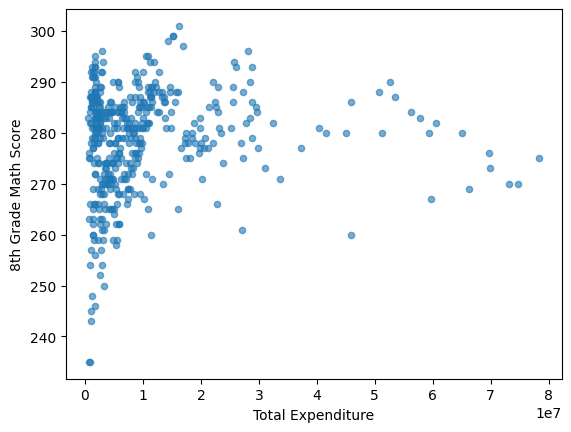

In [32]:
df1.plot.scatter(x="TOTAL_EXPENDITURE", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel('Total Expenditure')
plt.ylabel('8th Grade Math Score')

**<It seems like there is only a small correlation between total expenditure and 8th grade math scores.  Particularly, after meeting an initial threshold for minimum spending, there may be no correlation whatsoever.>**

**Visualization 2**

Text(0, 0.5, 'Total Expenditure Per Primary Enrollment')

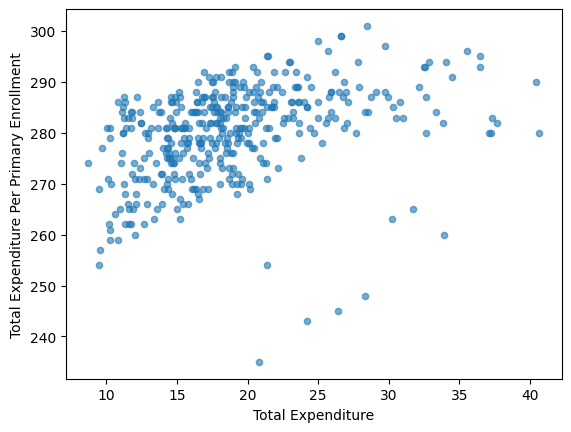

In [33]:
df1.plot.scatter(x="TOTAL_EXPENDITURE_PER_PRIMARY", y="AVG_MATH_8_SCORE", alpha=0.6)
plt.xlabel('Total Expenditure')
plt.ylabel('Total Expenditure Per Primary Enrollment')

**<Mapping total expenditure per primary enrollment vs math score seems to show a higher correlation than above.  Still, it seems like perhaps there is only a positive correlation up until a certain point (around $30/student perhaps).  The data for this graph is noticeably sparser than the one plotted above.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df1[['AVG_MATH_4_SCORE',"TOTAL_EXPENDITURE_PER_PRIMARY"]].dropna()
y = df1.loc[X.index]['AVG_MATH_8_SCORE']

In [36]:
y.fillna(y.median(), inplace=True)

In [37]:
 X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [38]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [39]:
# create your model here
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [42]:
model.score(X_test, y_test)

0.7864531613117588

In [43]:
np.mean(np.abs(model.predict(X_test)-y_test))

3.1484701999717966

In [44]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

4.114331590433943

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

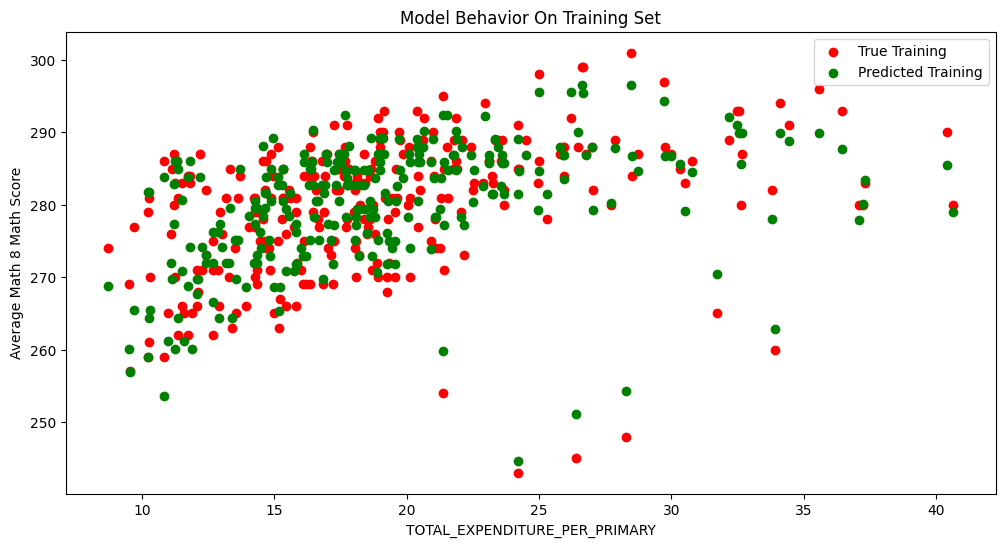

In [45]:
col_name = "TOTAL_EXPENDITURE_PER_PRIMARY"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

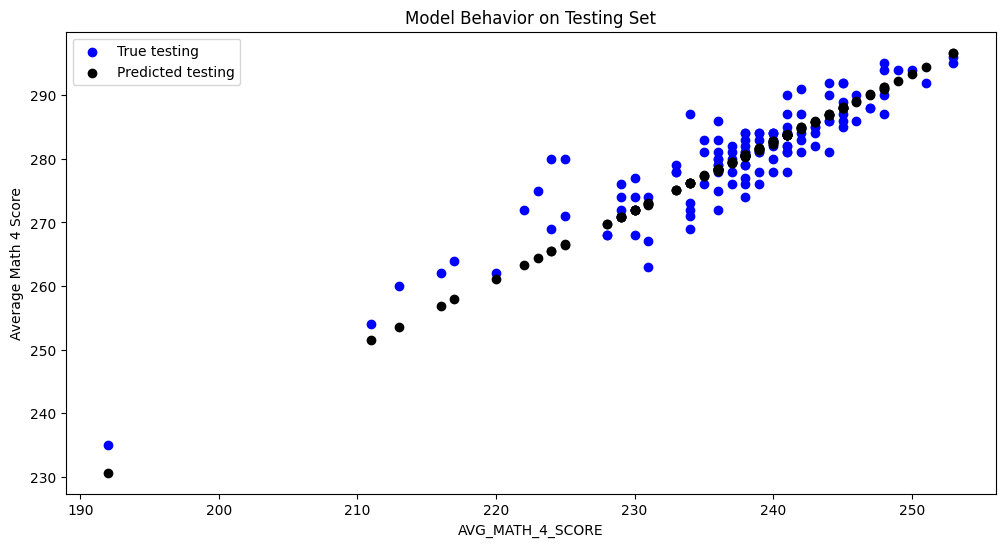

In [46]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 4 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<The first predictor does not seem to show as strong as prediction value as I would have thought. In the second visualization we do see a strong linear correlation between the average math 4 score and the average math 8 score.  \>**